<h2>Introduction</h2>

The objective is to accurately predict the Length of Stay for each patient on case by case 
basis so that the Hospitals can use this information for optimal resource allocation and 
better functioning. The length of stay is divided into 11 different classes ranging from 0-
10 days to more than 100 days

<h2>Importing the Required Libraries</h2>

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

<h2>Reading the Dataset</h2>

In [25]:
df = pd.read_csv('LOS_Data.csv')

<h2>First Five Observation in the Data Set</h2>

In [26]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


<h2>About the Data Set</h2>

In [27]:
df.shape

(318438, 18)

We can see that the data has 318438 observations and 18 variables

<h2>About the Features </h2>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [29]:
df['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

From the Above Result we can see that Bed Grade has float64 datatype,but it is a categorical variable hence it needs to be converted

In [6]:
df['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

From the above result we can see that City Code Patient is in int,but it is a categorical variable and needs to be converted

In [7]:
df['Hospital_code'].value_counts()

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

From the above result we can see that Hospital code is in int,but it is a categorical variable and needs to be converted

In [9]:
df['City_Code_Hospital'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

From the above result we can see that Hospital code is in int,but it is a categorical variable and needs to be converted

In [30]:
df['Bed Grade'] = df['Bed Grade'].astype('object')
df['City_Code_Patient'] = df['City_Code_Patient'].astype('object')
df['Hospital_code'] = df['Hospital_code'].astype('object')
df['City_Code_Hospital']= df['City_Code_Hospital'].astype('object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Bed Grade, City Code Patient,Hospital code and city code hospital has been converted to object

In [32]:
print('Categorical Features Includes : ')
print()
Categorical = []
for i in df.select_dtypes(include=['object']).columns:
    print(i)
    Categorical.append(i)

Categorical Features Includes : 

Hospital_code
Hospital_type_code
City_Code_Hospital
Hospital_region_code
Department
Ward_Type
Ward_Facility_Code
Bed Grade
City_Code_Patient
Type of Admission
Severity of Illness
Age
Stay


In [33]:
print('Numerical Features Includes: ')
print()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Numerical = []
for i in df.select_dtypes(include=numerics).columns:
    print(i)
    Numerical.append(i)

Numerical Features Includes: 

case_id
Available Extra Rooms in Hospital
patientid
Visitors with Patient
Admission_Deposit


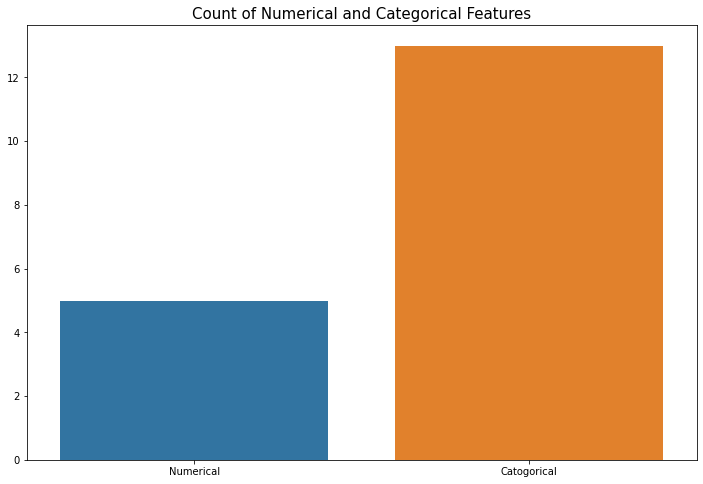

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x = ['Numerical','Catogorical'],y=[len(Numerical),len(Categorical)])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

From the Above Plot we can see that there are 5 Numerical and 13 Categorical features

<h2>Missing Values in the Data Set</h2>

In [35]:
missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.035486


<h2>Visualization of Missing Values</h2>

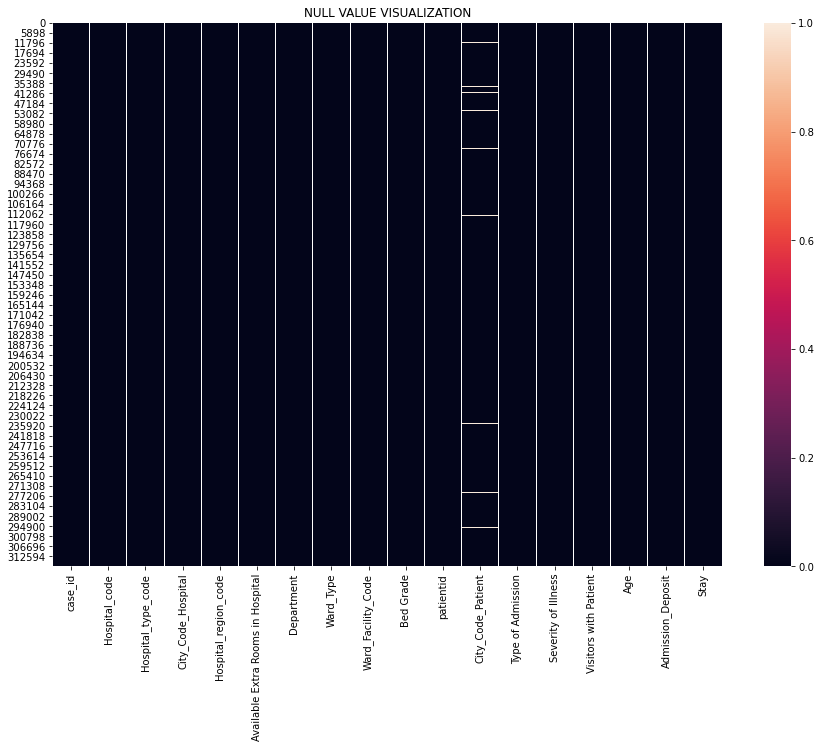

In [59]:
plt.figure(figsize=(15,10))
plt.title('NULL VALUE VISUALIZATION')
sns.heatmap(df.isnull())
plt.show()

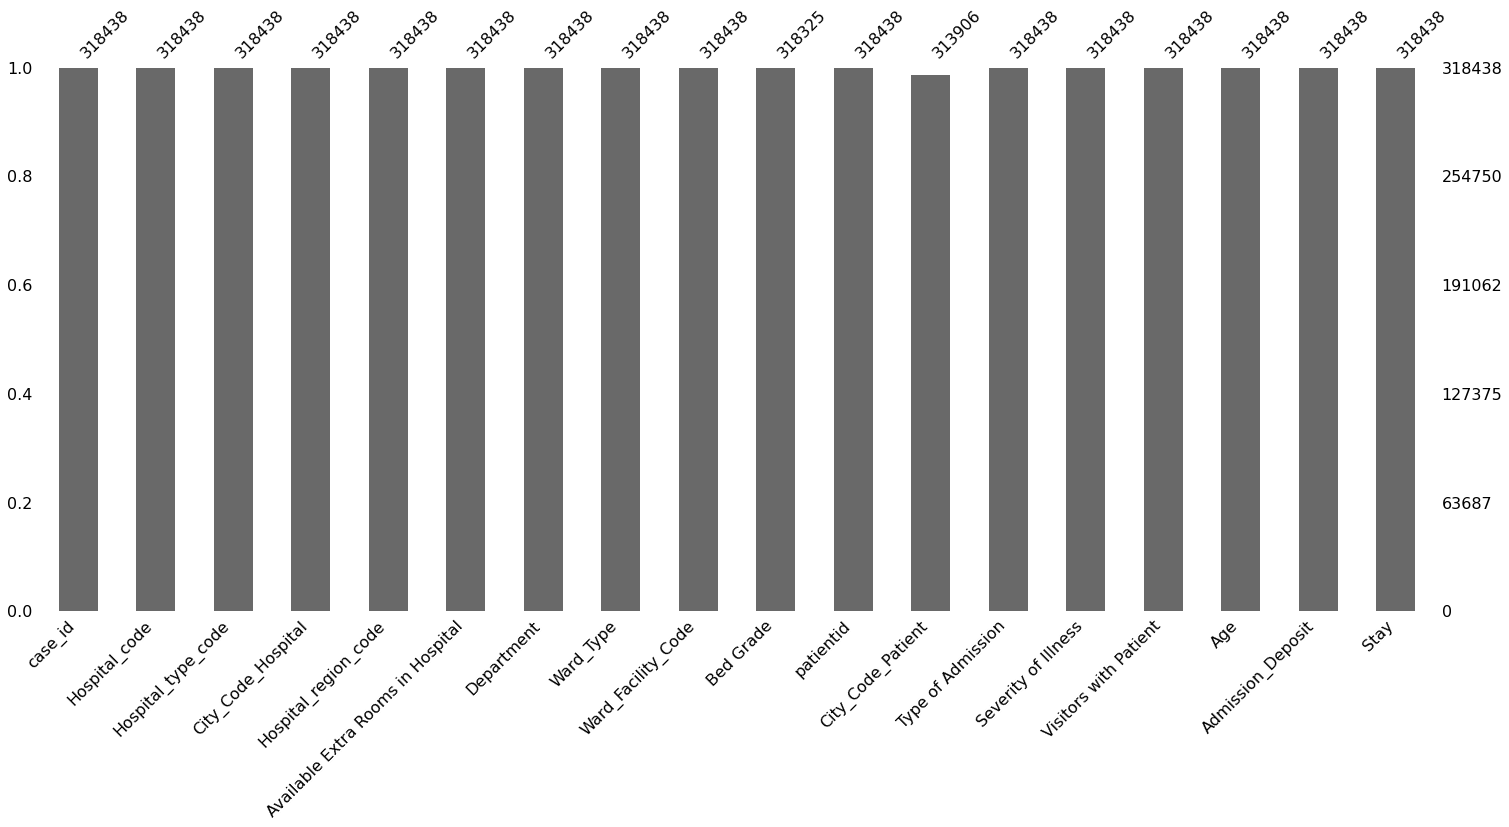

In [119]:
msno.bar(df)
plt.show()

From the Above Visualization Charts we can see that there is very less amount of null values present in the columns 
Bed Grade with 0.035486 precentage and City Code Patient with 1.423197 percentage

<h2>Univariant Analysis for Numerical Features</h2>

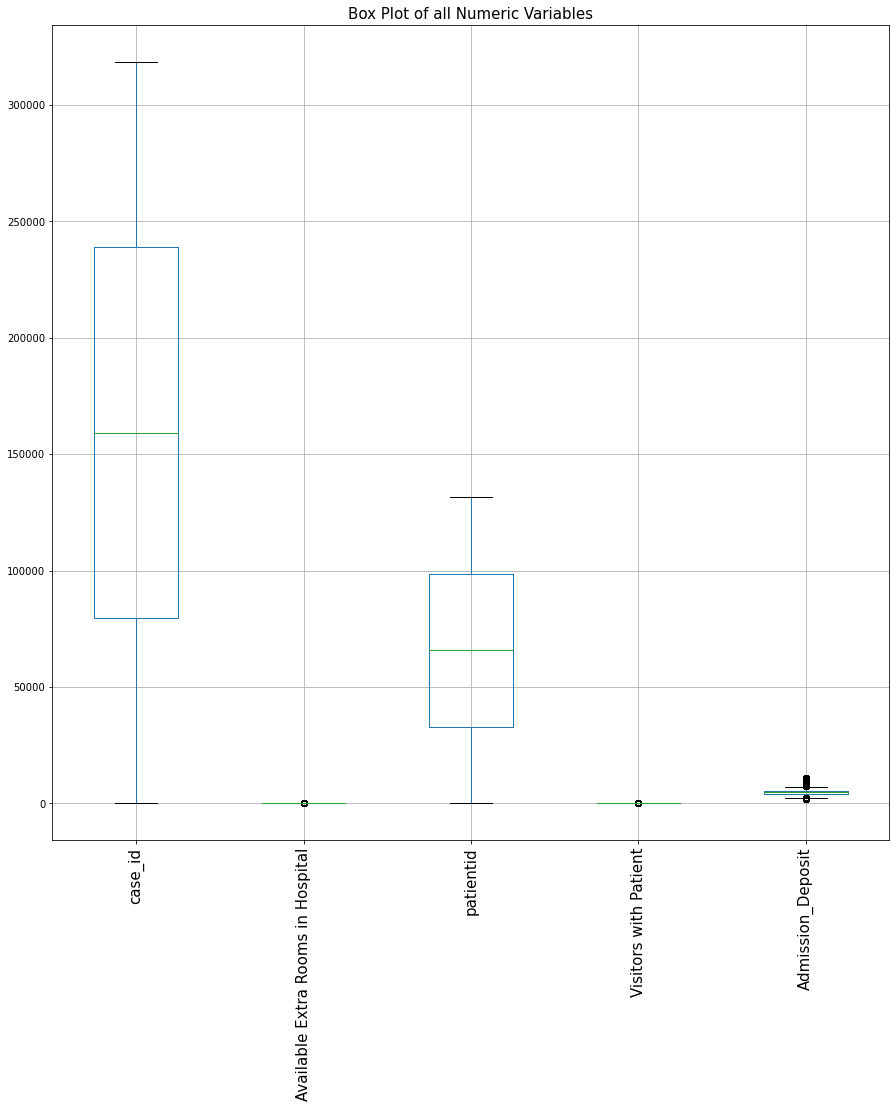

In [33]:
plt.figure(figsize=(15,15))
df_numerical = df.select_dtypes(include=np.number)
df_numerical.boxplot()
plt.title('Box Plot of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

<p>Notice that the variables 'Admission_Deposit' has a quite large range as compared to the other variables. Since 
 there is no distribution seen for Hospital_Code,City_Code_Hospitals,we plot the boxplots of independent variables again by not considering the 'Admission_Deposit'variables.</p>

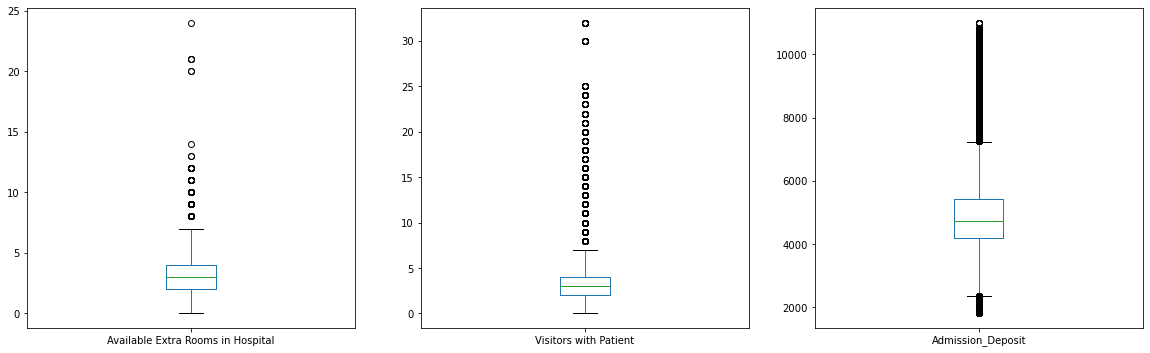

In [20]:
plt.rcParams["figure.figsize"] = [20,20]
df_num = df.select_dtypes(include=np.number)
df_num.iloc[:,[1,3,4]].plot(kind = "box",subplots = True,layout = (3,3))
plt.show()

For Available Extra Rooms in Hospital and Visistors with Patient the Outliers are present in the Upper Whisker and 
for Admission Deposit the Outliers are present in both the sides

The Inter Quartile Range for Vistors with Patient is very Less when compared to the other Columns

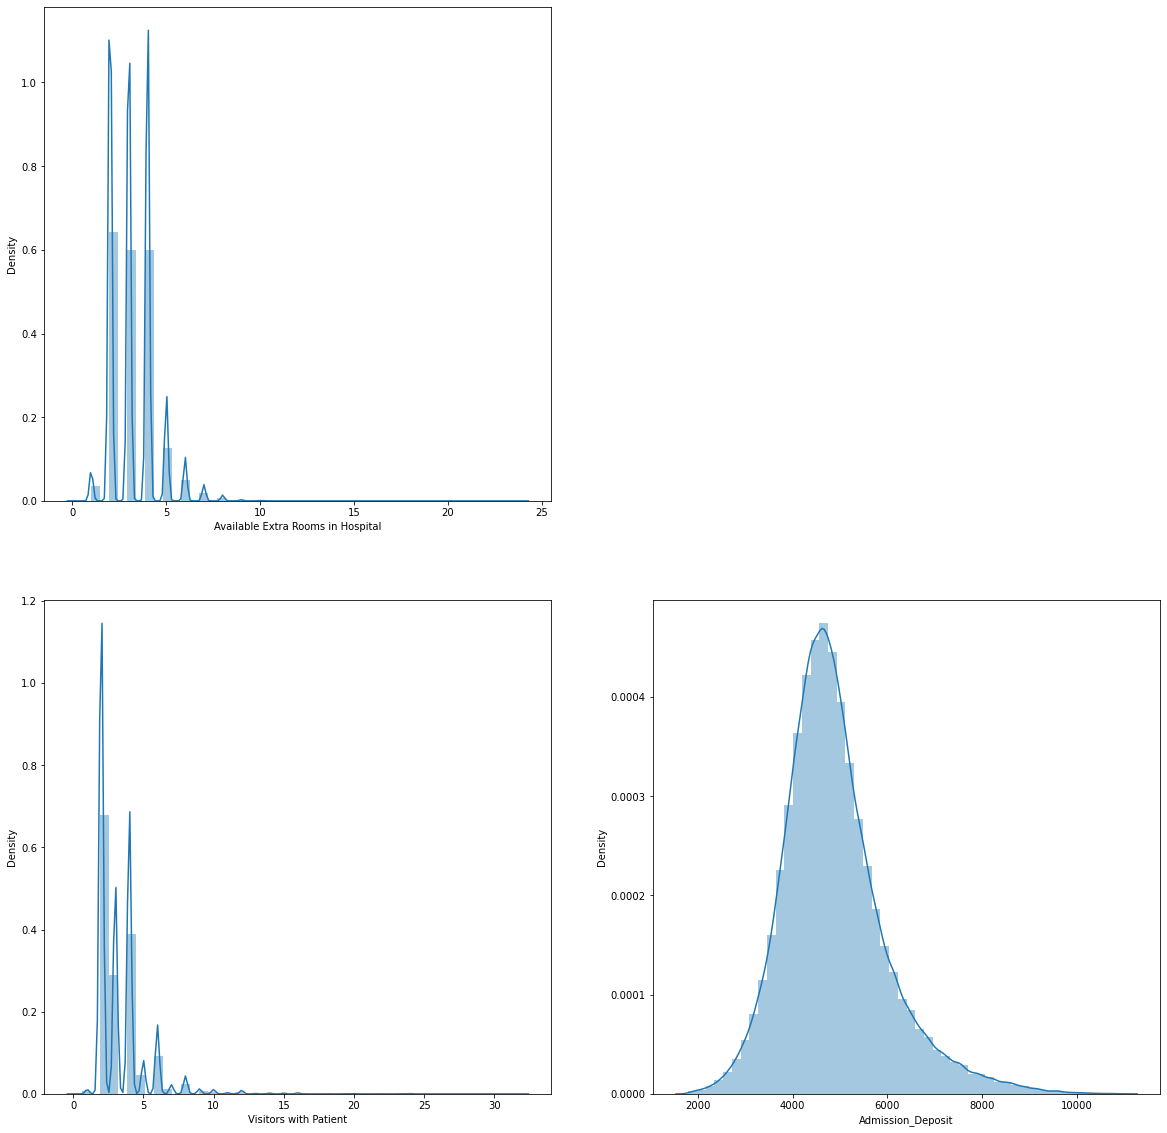

In [21]:
numerical = df.select_dtypes(include=np.number)
numerical.head()
list(enumerate(numerical))
plt.figure(figsize=(20,20))
plt.tight_layout()
for i in enumerate(numerical):
    if i[0]==0 or i[0]==2:
        continue
    else:
        plt.subplot(2,2,i[0])
        sns.distplot(numerical[i[1]])

Available Extra Rooms in Hospital,Visitors With Patient and Admission Deposit is having Positive Skewness

<h3>Univariate Analysis For Categorical Variables</h3>

In [22]:
categorical = df.select_dtypes(include = 'object')
categorical = categorical.drop(columns='City_Code_Patient')

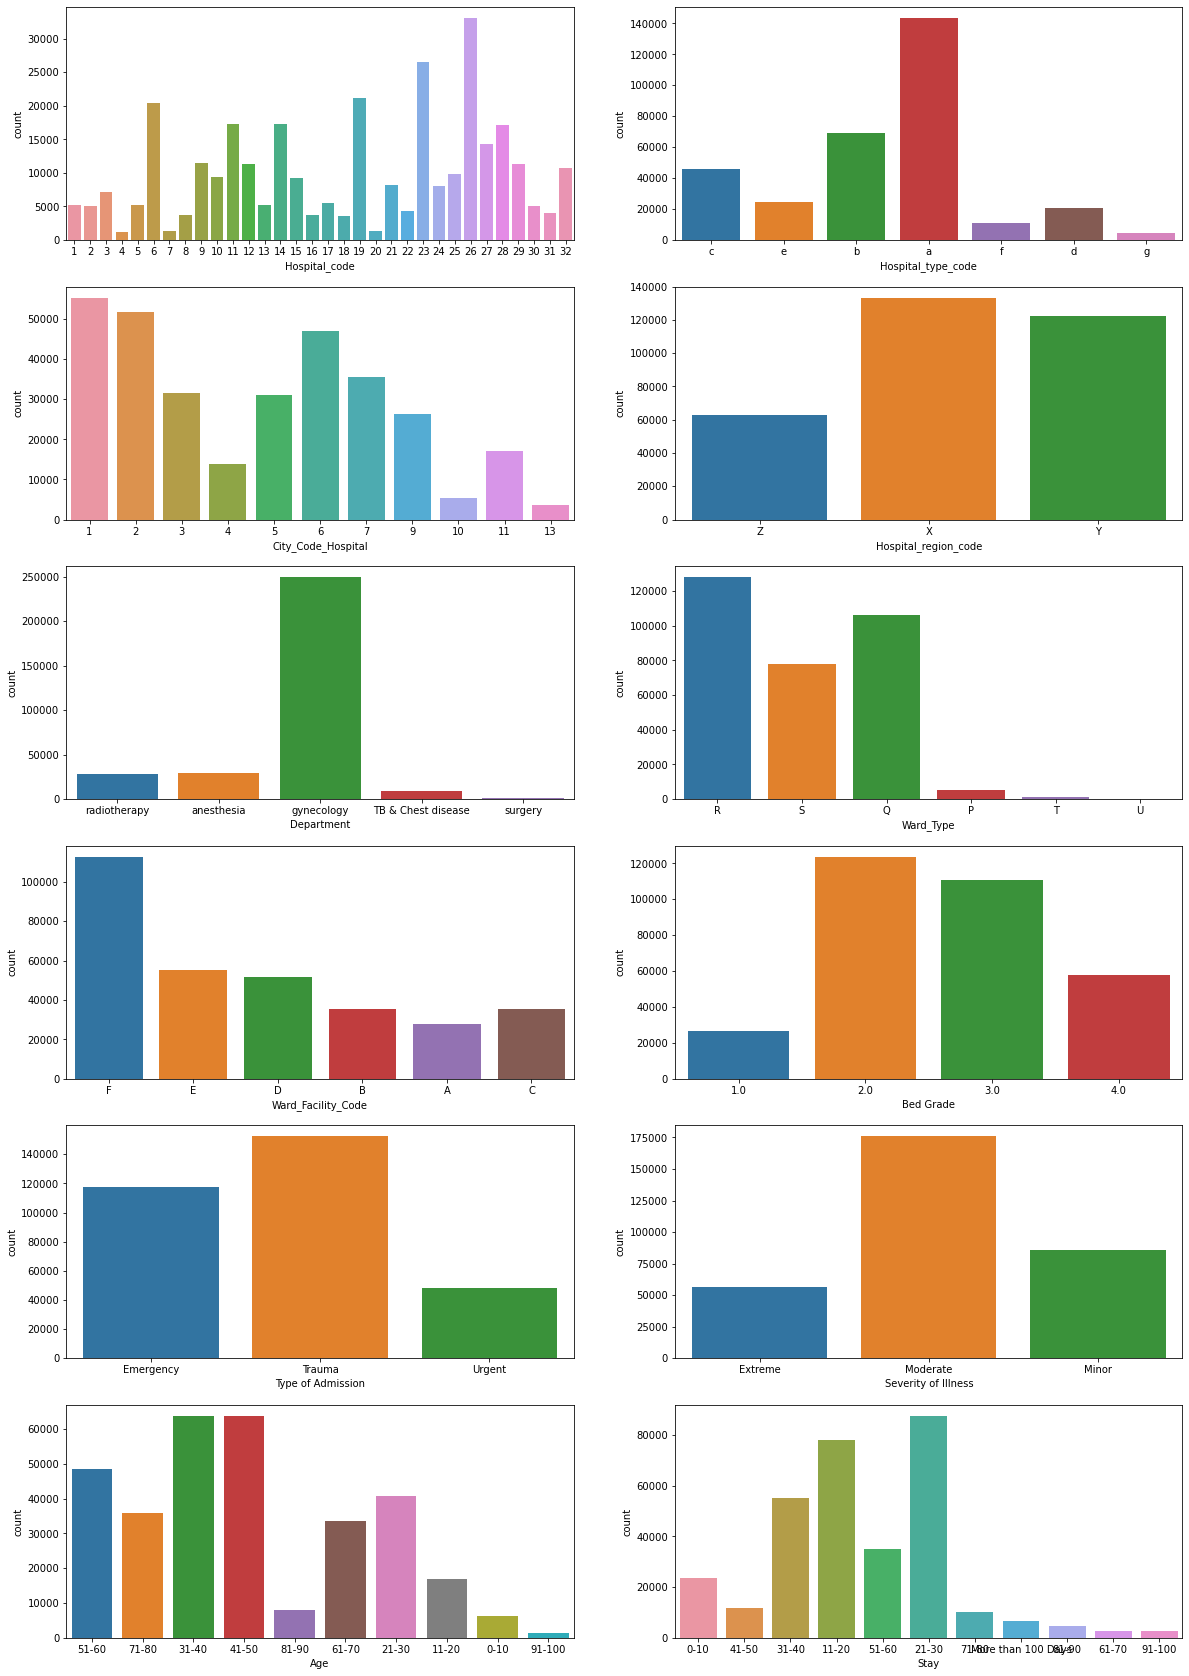

In [23]:
list(enumerate(categorical))
plt.figure(figsize=(20,30))
for i in enumerate(categorical):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(i[1],data=categorical)

From the Above Plot we can say that :

<h6>Hospital Code</h6>

The Count of Hospital Code 26 is more and the count of hospital code 20 is less and the count of hospital code 1 and hospital 
code 2 are same

<h6>Hospital Type Code</h6>

The Count of the A Type Hospital Code is more when compared with others and the count of G type hospital Code is less 
when compared to others

<h5>Hospital Region Code</h5>

The Count of the X type Hospital Region Code is more when compared with others and the count of Z type hospital code is 
less when compared with others

<h5>Department</h5>

The Count of the Gynocology Department is more when compared to other and the count of surgery department is less when compared to others

<h5>Ward_Type</h5>

The Count of R Ward Type is more when compared to others and the count of U Ward Type is less when compared to others

<h5>Ward_Facility_Code</h5>

The Count of F Ward Facility Code is more when compared to others and the count of A ward Facility code is less when compared to others

<h5>Bed Grade</h5>

The Count of Bed Grade 2 is more when compared to others and the count of bed grade 1 is very less when compared to others

<h5>Type of Admission</h5>

The Count of Trauma is more when compared to others and the count of Urgent is less when compared to others

<h5>Severity of Illness</h5>

The Count of Moderate is more when compared to others and the count of Extreme is very less when compared to others

<h5>Age</h5>

The Count of Age 31-40 and 41-50 are same and they are maximum.
The Count of Age 91-100 are very less when compared to others

<h5>Stay</h5>

The Count of Patient Stay 21-30 are maximum.The Count of Patient Stay 61-70 and 91-100 are same and are minimum

<h2>Bivariate Analysis</h2>

In [63]:
#Seperating Independent and Target Feature
df_target = df['Stay']
df_ind = df.drop(columns='Stay')

In [64]:
#Seperating Numerical Feature
df_ind_num = df_ind.select_dtypes(include=np.number)

In [65]:
#Seperating Categorical Feature
df_ind_cat = df_ind.select_dtypes(include='object')

In [66]:
df_ind_cat.drop(columns='City_Code_Patient',inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<h3>Bivariate Analysis for All the Categorical Variable and the Target Variable</h3>

Since the target variable(Length of Stay) is Categorical we have used Side by Side Bar Chart for Visualization between all the Categorical features and Target Feature 

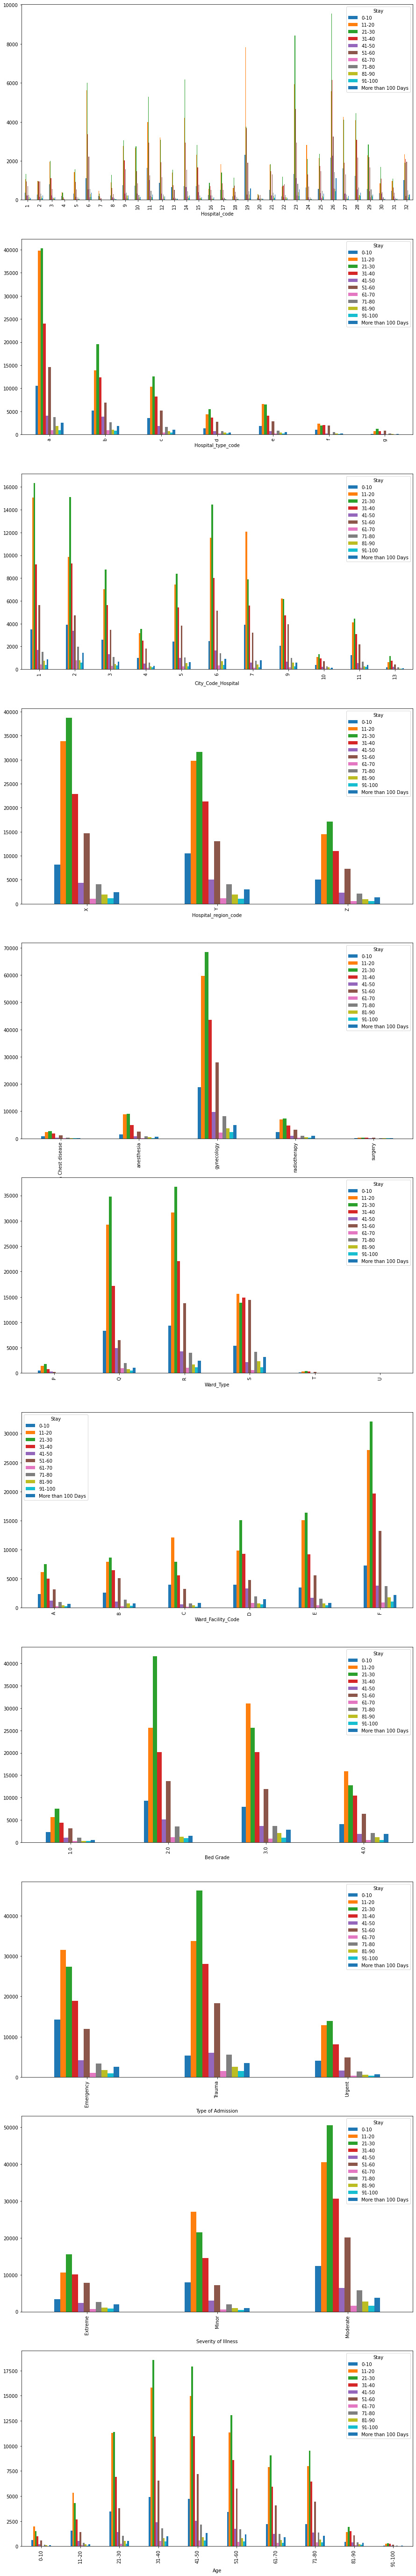

In [38]:
fig, axs = plt.subplots(11,1)
k = 0
for i in range(11):
    if k == 11:
        break
    else:
        pd.crosstab(df_ind_cat.iloc[:,k],df_target).plot(kind='bar',ax=axs[i],figsize=(15,100))
        k=k+1

<h5>Type of Admission Vs Stay</h5>

We can see that for the Emergency type of admission the average length of stay is more for stay between 11-20
and for Trauma type of admission the  average length of stay is more for stay between 21-30 and for urgent type of admission 
average length of stay is more for stay between 21-30

<h5>Severity of illness Vs Stay</h5>

We can see that for Extreme Illness the average length of stay is more for stay between 21-30 and for minor illness 
average length of stay is more for stay between 11-20 and for Moderate illness average length of stay is more for stay 
between 21-30

<h5>Hospital type Code</h5>

For hospital code of A type average length of stay is more for stay between 21-30 and for For hospital code of B type average length of stay is more for stay between 21-30 and for for hospital code of C type average length of stay is more for stay between 21-30 and for hospital code of D type average length of stay is more for stay between 21-30 and for hospital code of E type average length of stay is more for stay between 11-20 and for hospital code of F type average length of stay is more for stay between 11-20 and for hospital code of g type average length of stay is more for stay between 21-30

<h5>Hospital Region Code</h5>

For Region Code X average length of stay is more for stay between 21-30 and for Region Code Y average length of stay is more for stay between 21-30 and for Region Code Z average length of stay is more for stay between 21-30

<h5>Department</h5>

For Chest Dieases  average length of stay is more for stay between 21-30 and for anesthesia the average length of stay is more for stay between 21-30 and for gynocology average length of stay is more for stay between 21-30 and for radiotherapy 
the average length of stay is more for stay between 21-30

<h5>Ward Type Vs Stay</h5>

For P ward type average length of stay is more for stay between 21-30 and for Q ward type average length of stay is more for stay between 21-30 and for R ward type average length of stay is more for stay between 21-30 and for S ward type average length of stay is more for stay between 11-20

<h5>Bed Grade Vs Stay</h5>

For Bed Grade 1.0 the average length of stay is more for stay between 21-30 and for Bed Grade 2.0 the average length of stay is more for stay between 21-30 and for Bed Grade 3.0 the average length of stay is more for stay between 11-20 and for Bed Grade 4.0 the average length of stay is more for stay between 11-20

<h5>Ward Facility Code Vs Stay</h5>

For Ward Facility A the average length of stay is more for stay between 21-30 and for Ward Facility B the average length of stay is more for stay between 21-30 and for Ward Facility C the average length of stay is more for stay between 11-20 and 
for Ward Facility D the average length of stay is more for stay between 21-30 and for Ward Facility E the average length of stay is more for stay between 21-30 and for Ward Facility E the average length of stay is more for stay between 21-30 and 
for Ward Facility F the average length of stay is more for stay between 21-30

<h6>Age Vs Stay</h6>

From the above Bar graph we can see that for the age between 0-10 the average length of stay of patient is more for stay between 11-20
and the average length of stay is less for stay between 81-90 and 91-100.For the age between 11-20 the average length of stay 
is more for stay between 11-20 and less for stay between 91-100.For the age between 21-30 the average length of stay is more for stay between 21-30 and less between 91-100.For the Age between 31-40 the  average length of stay is more for stay between 21-30 and less between 91-100 and 61-70 which are same.For the Age between 41-50 the  average length of stay is more for stay between 21-30 and less between 91-100 and 61-70 which are same.For the Age between 51-60 the  average length of stay is more for stay between 21-30 and less between 91-100 and 61-70 which are same.For the Age between 61-70 the  average length of stay is more for stay between 21-30 and less between 91-100 and 61-70 which are same.For the Age between 71-80 the  average length of stay is more for stay between 21-30 and less between 91-100 and 61-70 which are same.For the Age between 81-90 the  average length of stay is more for stay between 21-30 and less between 61-70.

<h3>Bivariate Analysis for all numerical Variable and Target Variable</h3>

Since the target variable(Length of Stay) is Categorical we have used Bar Chart for Visualization between all the numerical features and Target Feature 

In [47]:
df_ind_num_concat

,case_id,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Stay
0,1,3,2,4911.0,0-10
1,2,2,2,5954.0,41-50
2,3,2,2,4745.0,31-40
3,4,2,2,7272.0,41-50
4,5,2,2,5558.0,41-50
...,...,...,...,...,...
318433,318434,3,3,4144.0,11-20
318434,318435,2,4,6699.0,31-40
318435,318436,3,3,4235.0,11-20
318436,318437,3,5,3761.0,11-20


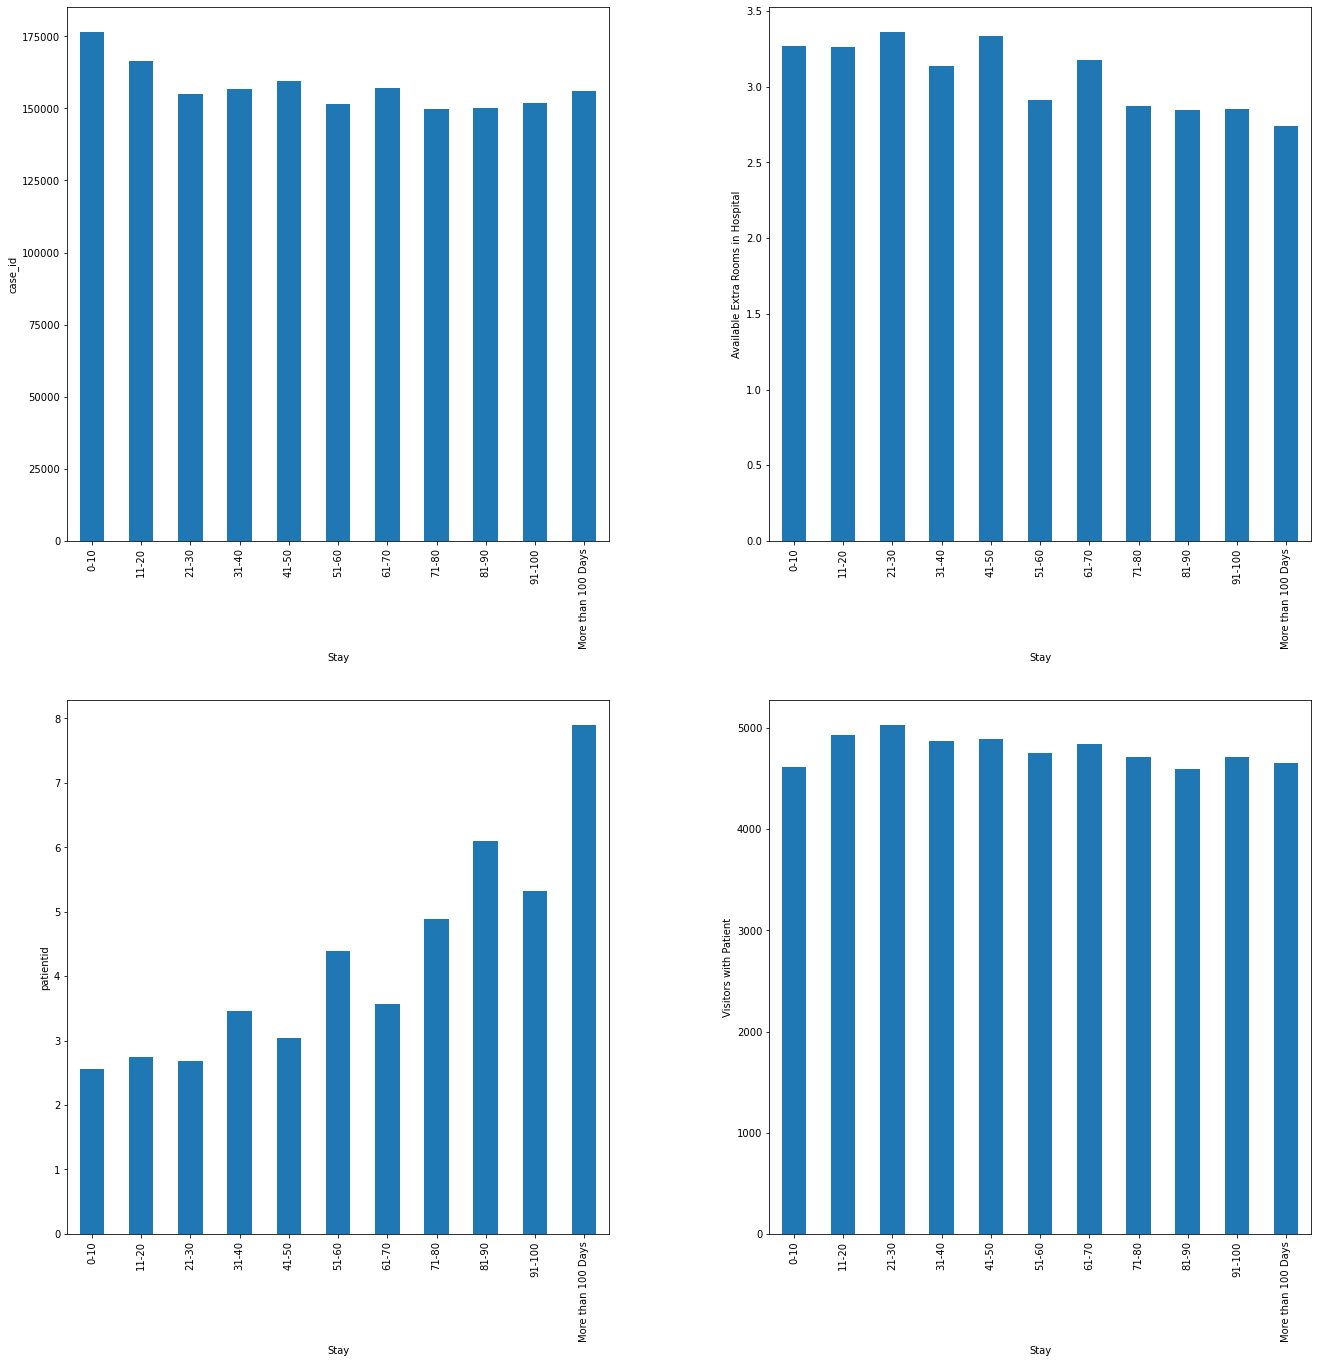

In [48]:
fig, axs = plt.subplots(2,2)
plt.tight_layout()
k=0
for i in range(2):
    for j in range(2):
        df_ind_num_concat.groupby(by='Stay').mean().iloc[:,k].plot(kind='bar',ax=axs[i,j],figsize=(20,20),xlabel='Stay',ylabel=df_ind_num.columns[k])
        k = k+1

<h5>Case_Id Vs Stay</h5>

For the above bar plot we can see that the Average cases are more for the stay between 0-10 and the Average cases
are same for the stay between 71-80 and 81-90 which is also less when compared to others

<h5>Available Extra rooms in Hospital Vs Stay</h5>

For the above bar plot we can see that the Average extra rooms  are same for the Patient stay between 0-10 and 11-20 and the Average extra rooms are more for the Patient stay between 21-30 and Average extra rooms are less for the Patient stay more than 100 days

<h5>Visitors with Patient Vs Stay</h5>

For the Above bar plot we can see that the Average Visitors with patient are more for the Patient stay more than 100 days
and the Average Visitors with patient are less for the Patient stay between 0-10 days and the Average Visitors with patient are same for Patient stay between 31-40 and 61-70

<h5>Admission Deposit Vs Stay</h5>

From the Above Bar plot we can see that the average admission deposit is more for Patient stay between 21-30 and the average admission deposit is less for patient stay between 0-10

<h2>Missing Value Imputation</h2>

In [36]:
missing_values

,Number of Missing Values,Percentage of Missing Values
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.035486


<p>From the Above Result we can see that Bed Grade and City_Code_Patient have missing Values</p>

<h3>Filling the missing values for Bed Grade</h3> 

For Bed Grade mode has been used to fill the missing values

In [9]:
df['Bed Grade'].mode()

0    2
dtype: object

In [37]:
df['Bed Grade'] = df['Bed Grade'].fillna('2.0')
missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

,Number of Missing Values,Percentage of Missing Values
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,0,0.000000


From the Above Result we can see that the null values for the feature Bed Grade has been filled

<h3>Filling the missing values for City Code Patient </h3>

For filling the missing values of city code patient we have build a Logistic regression model.The City code patient has been considerd as a target feature.The model has been trained on the records where the city code patient is not null and it has been fitted. The predictions has been made for the city code patient which has null values .The Predicted values of city code patient has been used to fill the missing values of city code patient

In [38]:
#Splitting the Train and test data seperately by having the Records where city code patient is not null as train set and 
#the Records where city code patient is  null as test set
df_test = df[df['City_Code_Patient'].isnull()].drop(columns=['Stay','case_id','patientid'],axis=1)
df_train = df[~df['City_Code_Patient'].isnull()].drop(columns=['Stay','case_id','patientid'],axis=1)
print(df_train.shape)
print(df_test.shape)

(313906, 15)
(4532, 15)


In [39]:
df_target = df_train['City_Code_Patient']
df_target_num =  df_target.astype(np.number)
df_train_num = df_train.select_dtypes(np.number)
df_train_num.corrwith(df_target_num)

Available Extra Rooms in Hospital   -0.009681
Visitors with Patient               -0.012074
Admission_Deposit                    0.025837
dtype: float64

From the above result we can see that Admission Deposit is having good correlation with the City Code Patient and hence we can drop the Availale Extra Rooms in Hospital and Visitors with Patient feature

In [40]:
df_train_num = df_train_num.drop(columns=['Available Extra Rooms in Hospital','Visitors with Patient'])
log_model=LogisticRegression()
log_model.fit(df_train_num,df_target_num)
pred = log_model.predict(df_test[['Admission_Deposit']])
df['City_Code_Patient'] = df.City_Code_Patient.replace({np.nan:pred})
missing_values = pd.DataFrame({'Number of Missing Values':list(df.isnull().sum().values),
                               'Percentage of Missing Values':list(((df.isnull().sum()/len(df))*100).values)},
                                index=list(df.columns))
missing_values

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Number of Missing Values,Percentage of Missing Values
case_id,0,0.0
Hospital_code,0,0.0
Hospital_type_code,0,0.0
City_Code_Hospital,0,0.0
Hospital_region_code,0,0.0
Available Extra Rooms in Hospital,0,0.0
Department,0,0.0
Ward_Type,0,0.0
Ward_Facility_Code,0,0.0
Bed Grade,0,0.0


From the Above result we can see that missing values has been filled for city code patient

<h3>Base Model</h3>

Since the target feature to predict is a categorical fetaure classification algorithms has been implemented

In [41]:
ind_var = df.drop(columns=['Stay'])
target_var = df['Stay']
num = ind_var.select_dtypes(include=np.number).drop(columns=['case_id','patientid'])
cat = ind_var.select_dtypes(include=np.object)
LE = LabelEncoder()
for i in cat.columns:
    cat[i] = LE.fit_transform(cat[i].astype(str))
    ind_var = pd.concat(objs = (num,cat),axis=1)
LE = LabelEncoder()
target_var = pd.Series(LE.fit_transform(target_var))
X_train,X_test,Y_train,Y_test = train_test_split(ind_var,target_var,test_size=0.3,random_state=10,stratify=target_var)
print('X_train', X_train.shape)
print('y_train', Y_train.shape)
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

<ipython-input-41-9050dece15bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[i] = LE.fit_transform(cat[i].astype(str))


X_train (222906, 15)
y_train (222906,)
X_test (95532, 15)
y_test (95532,)


<h4>Target Variable Encoded Values</h4>

In [42]:
independent_var = df.drop(columns='Stay')
tar_var = list(df['Stay'])
tar_var_Encoded = pd.Series(LE.fit_transform(tar_var))
tar_Encoded = pd.DataFrame({'Stay':tar_var,'Stay_Encoded':tar_var_Encoded})
tar_Encoded.drop_duplicates('Stay').sort_values(by='Stay_Encoded')

,Stay,Stay_Encoded
0,0-10,0
5,11-20,1
10,21-30,2
2,31-40,3
1,41-50,4
8,51-60,5
232,61-70,6
39,71-80,7
93,81-90,8
297,91-100,9


The Above Results are the encoded values for stay column

<h4>Function for getting the scores for the model</h4>

In [43]:
def get_scores(model,proba):
    pred = model.predict(X_test)
    scores = {'Accuracy':round(accuracy_score(Y_test,pred),2),
              'Precision':round(precision_score(Y_test,pred,average='macro'),2),
              'Recall':round(recall_score(Y_test,pred,average='macro'),2),
              'f1-Score':round(f1_score(Y_test,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(Y_test,pred),2),
              'ROC-AUC Socre':round(roc_auc_score(Y_test,proba),2)
             }
    return scores
def get_train_scores(train_model,proba):
    pred = train_model.predict(X_train)
    scores = {'Accuracy':round(accuracy_score(Y_train,pred),2),
              'Precision':round(precision_score(Y_train,pred,average='macro'),2),
              'Recall':round(recall_score(Y_train,pred,average='macro'),2),
              'f1-Score':round(f1_score(Y_train,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(Y_train,pred),2),
              'ROC-AUC Socre':round(roc_auc_score(Y_train,proba),2)
             }
    return scores

<h3>Logistic Regression</h3>

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


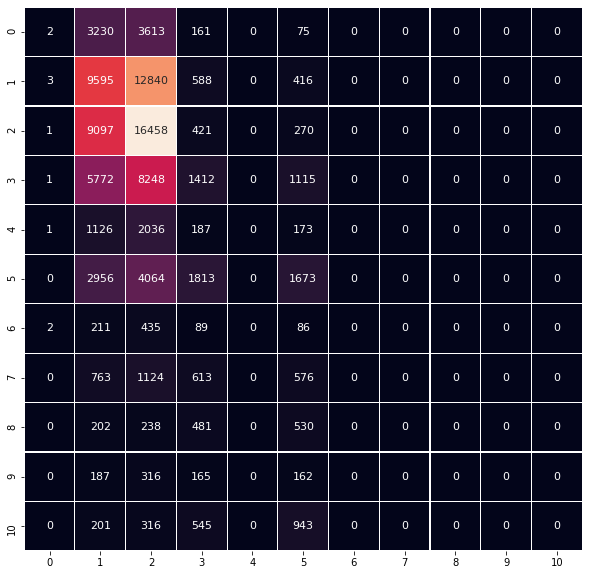

In [44]:
log_base_model=LogisticRegression()
log_base_model.fit(X_train,Y_train)
baselog_predict = log_base_model.predict(X_test)
train_log_pred_prob = log_base_model.predict_proba(X_train)
test_log_pred_prob = log_base_model.predict_proba(X_test)
cm = confusion_matrix(Y_test,baselog_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

<h3>Decision Tree</h3>

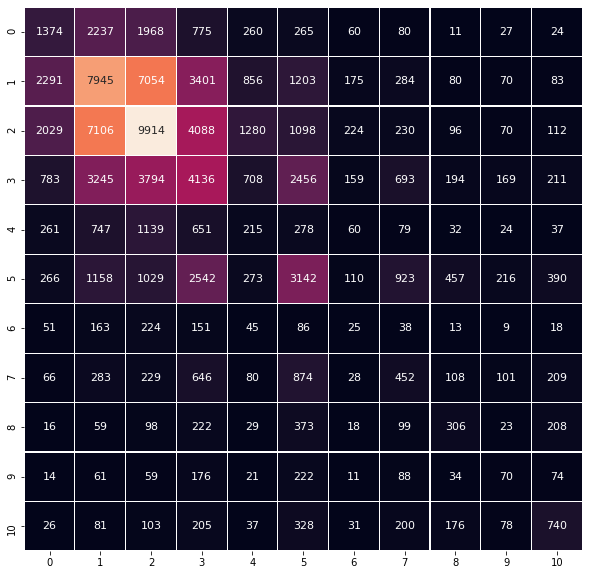

In [45]:
clf = DecisionTreeClassifier(random_state=10)
decision_tree = clf.fit(X_train,Y_train)
y_pred_dt = decision_tree.predict(X_test)
cm_dt = confusion_matrix(Y_test,y_pred_dt)
train_dt_prob = decision_tree.predict_proba(X_train)
test_dt_prob = decision_tree.predict_proba(X_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm_dt,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

<h3>Random Forest</h3>

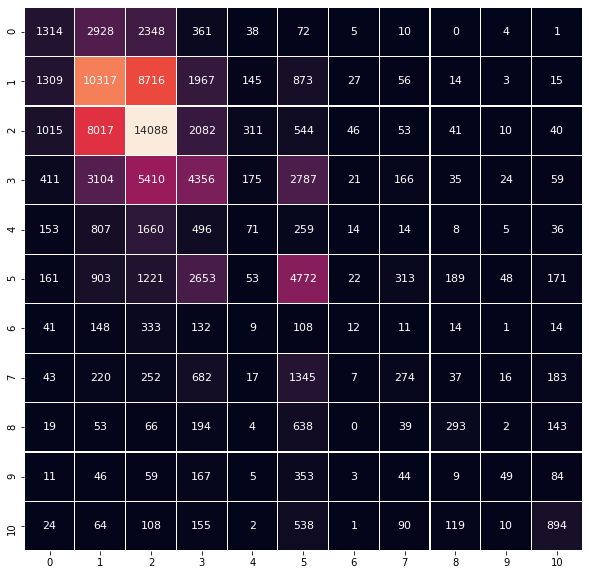

In [46]:
rf=RandomForestClassifier(random_state=10)
r_forest = rf.fit(X_train,Y_train)
y_pred_Rf=r_forest.predict(X_test)
train_pred_rf_prob = r_forest.predict_proba(X_train)
test_pred_rf_prob = r_forest.predict_proba(X_test)
cm_rf = confusion_matrix(Y_test,y_pred_Rf)
plt.figure(figsize=(10,10))
sns.heatmap(cm_rf,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

<h3>Score Comparison of Base Line Models</h3>

In [21]:
model_per =pd.DataFrame({'Logistic Regression':get_scores(log_base_model),'Decision Tree':get_scores(decision_tree),
                         'Random Forest':get_scores(r_forest)})
model_per

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.31,0.30,0.38
Precision,0.12,0.21,0.31
Recall,0.12,0.21,0.25
f1-Score,0.10,0.21,0.26
Kappa Score,0.08,0.14,0.22


<h3>Converting the target variable to Binary Classfier</h3>

In [47]:
df_dup = df.copy()
df_dup['City_Code_Patient'] = df_dup['City_Code_Patient'].astype(np.object)
df_dup['Stay'] = df_dup['Stay'].astype(np.object)
stay_dict = {'0-10':'Less Than 50 Days','11-20':'Less Than 50 Days','21-30':'Less Than 50 Days','31-40':'Less Than 50 Days','41-50':'Less Than 50 Days','51-60':'More Than 50 Days','61-70':'More Than 50 Days','71-80':'More Than 50 Days','81-90':'More Than 50 Days','91-100':'More Than 50 Days','More than 100 Days':'More Than 50 Days'}
df_dup['Stay_Enc'] = df_dup.Stay.map(stay_dict)
df_dup['Stay_Enc'].value_counts()

Less Than 50 Days    256136
More Than 50 Days     62302
Name: Stay_Enc, dtype: int64

In [48]:
independent_variable = df_dup.drop(columns=['Stay','Stay_Enc'])
target_variable = df_dup['Stay_Enc']
numerical_dup = independent_variable.select_dtypes(include=[np.number]).drop(columns=['case_id','patientid'])
categorical_dup = independent_variable.select_dtypes(include=[np.object])
LE = LabelEncoder()
for i in categorical_dup.columns:
    categorical_dup[i] = LE.fit_transform(categorical_dup[i].astype(str))
independent_var = pd.concat(objs=[numerical_dup,categorical_dup],axis=1)
target_variable = pd.get_dummies(target_variable,drop_first=True)
target_variable.value_counts()

<ipython-input-48-9482bf9b19cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dup[i] = LE.fit_transform(categorical_dup[i].astype(str))


More Than 50 Days
0                    256136
1                     62302
dtype: int64

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(independent_var,target_variable,test_size=0.3,random_state=10,stratify=target_variable)
print('X_train', X_train.shape)
print('y_train', Y_train.shape)
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (222906, 15)
y_train (222906, 1)
X_test (95532, 15)
y_test (95532, 1)


In [50]:
t_Encoded = pd.DataFrame({'Stay':df_dup['Stay_Enc'],'Stay_Encoded':target_variable.iloc[:,0]})
t_Encoded.drop_duplicates('Stay').sort_values(by='Stay_Encoded')

,Stay,Stay_Encoded
0,Less Than 50 Days,0
8,More Than 50 Days,1


The above result shows the encoded value for target feature

<h3>Logistic Regression</h3>

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


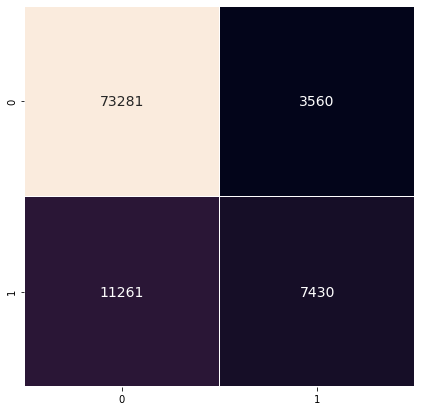

In [51]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
lg_pred = log_model.predict(X_test)
lg_prob_predict_train = log_model.predict_proba(X_train)[:,1]
lg_prob_predict_test = log_model.predict_proba(X_test)[:,1]
cm_lg = confusion_matrix(Y_test,lg_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm_lg,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':14},fmt='d')
plt.show()

<h3>Decision Tree</h3>

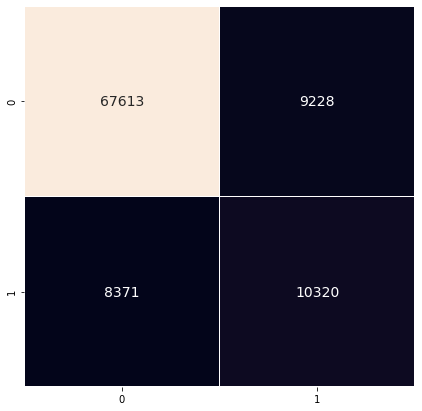

In [52]:
decision_tree_classification = DecisionTreeClassifier(random_state=10)
dt = decision_tree_classification.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)
train_dt_prob = dt.predict_proba(X_train)[:,1]
test_dt_prob = dt.predict_proba(X_test)[:,1]
dt_cm = confusion_matrix(Y_test,dt_pred)
plt.figure(figsize=(7,7))
sns.heatmap(dt_cm,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':14},fmt='d')
plt.show()

<h3>Random Forest</h3>

<ipython-input-53-cff1280f46e0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = random_forest.fit(X_train,Y_train)


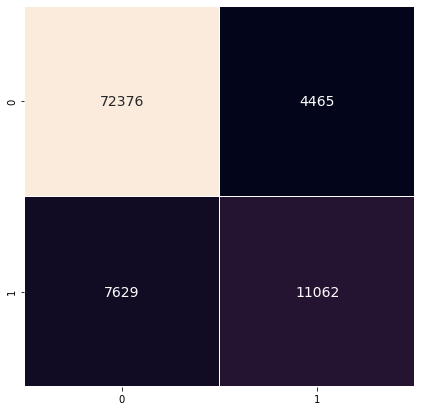

In [53]:
random_forest=RandomForestClassifier(random_state=10)
rf = random_forest.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
train_pred_rf_prob = rf.predict_proba(X_train)[:,1]
test_pred_rf_prob = rf.predict_proba(X_test)[:,1]
rf_cm = confusion_matrix(Y_test,rf_pred)
plt.figure(figsize=(7,7))
sns.heatmap(rf_cm,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':14},fmt='d')
plt.show()

<h3>Score Comparison</h3>

In [54]:
score_comparison = pd.DataFrame({'Logistic Regression':get_scores(log_model,lg_prob_predict_test),
                                 'Decision Tree':get_scores(dt,test_dt_prob),
                                 'Random Forest':get_scores(rf,test_pred_rf_prob)})
score_comparison

,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.84,0.82,0.87
Precision,0.77,0.71,0.81
Recall,0.68,0.72,0.77
f1-Score,0.70,0.71,0.78
Kappa Score,0.42,0.42,0.57
ROC-AUC Socre,0.84,0.72,0.88


<h3>Feature Importance</h3>

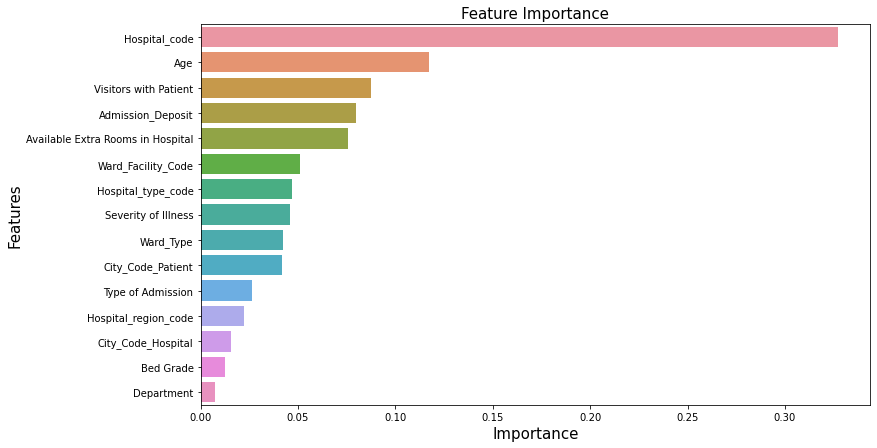

In [30]:
plt.figure(figsize=(12,7))
important_features = pd.DataFrame({'Features':X_train.columns,'Importance':clf.feature_importances_})
important_features = important_features.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Features',data=important_features)
plt.title('Feature Importance',fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.show()

<h4>Checking VIF Factor for Numerical Features</h4>

In [31]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(numerical_dup.values,i)  for  i in range(numerical_dup.shape[1])]
vif['Features'] = numerical_dup.columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,6.386199,Admission_Deposit
1,6.339164,Available Extra Rooms in Hospital
2,3.953757,Visitors with Patient


<h4>Performing Chi-Square test for Categorical features</h4>

In [32]:
categorical_data = df.select_dtypes(include=[np.object])
categorical_data['Stay_Encoded'] = categorical_data.Stay.map(stay_dict)
categorical_data.drop(columns='Stay',inplace=True)
def chisquare_pvalue(df_ind,df_target):
    contigency = pd.crosstab(df_ind,df_target)
    chisq_stat,p_value_chi_sq,df,ar = st.chi2_contingency(contigency)
    return p_value_chi_sq
p_values = [chisquare_pvalue(categorical_data.iloc[:,i],categorical_data['Stay_Encoded'])  for i in range(0,11)]
pd.DataFrame(p_values,index=list(categorical_data.columns)[:-1],columns=['P-Values'])

<ipython-input-32-5728ae55ccd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Stay_Encoded'] = categorical_data.Stay.map(stay_dict)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,P-Values
Hospital_code,0.000000e+00
Hospital_type_code,0.000000e+00
City_Code_Hospital,3.442051e-287
Hospital_region_code,2.655709e-13
Department,2.867148e-117
Ward_Type,0.000000e+00
Ward_Facility_Code,1.213740e-248
Bed Grade,6.833938e-102
Type of Admission,1.906047e-179
Severity of Illness,0.000000e+00


From the Above Feature Importance graph,VIF and Chisquare test results we can say that we can consider all the features.

<h3> Hyper Parameter Tuning for Decision Tree </h3>

In [120]:
decision_tree_classification = DecisionTreeClassifier(random_state=10)
dt = decision_tree_classification.fit(X_train,Y_train)
train_dt_prob = dt.predict_proba(X_train)[:,1]
test_dt_prob = dt.predict_proba(X_test)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(dt,train_dt_prob).values(),'Test Scores':get_scores(dt,test_dt_prob).values()},index=get_scores(dt,test_dt_prob).keys())

,Train Scores,Test Scores
Accuracy,1.0,0.82
Precision,1.0,0.71
Recall,1.0,0.72
f1-Score,1.0,0.71
Kappa Score,1.0,0.42
ROC-AUC Socre,1.0,0.72


From the Above scores of Train and test for decision tree we can see that the model is overfitted.

In [121]:
tuned_parameter = [{'criterion' : ['entropy','gini'],
                   'max_depth':[10,50,100],
                    'max_features':['sqrt','log2'],
                    'min_samples_split':[50,250,300]
                     }]
decision_tree_classification = DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=decision_tree_classification,param_grid=tuned_parameter,cv=5)
tree_grid_model = tree_grid.fit(X_train,Y_train)
print('Best Parameters for Decision Tree : ',tree_grid_model.best_params_)

Best Parameters for Decision Tree :  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 50}


In [143]:
train_prob_dt = tree_grid_model.predict_proba(X_train)[:,1]
test_prob_dt = tree_grid_model.predict_proba(X_test)[:,1]
dt_results = pd.DataFrame({'Train Scores':get_train_scores(tree_grid_model,train_prob_dt).values(),'Test Scores':get_scores(tree_grid_model,test_prob_dt).values()},index=get_scores(tree_grid_model,test_prob_dt).keys())

In [144]:
dt_results

,Train Scores,Test Scores
Accuracy,0.88,0.86
Precision,0.83,0.78
Recall,0.77,0.73
f1-Score,0.79,0.75
Kappa Score,0.59,0.50
ROC-AUC Socre,0.92,0.85


<h3>Hyperparameter tuning for Random Forest</h3>

In [124]:
random_forest=RandomForestClassifier(random_state=10)
rf = random_forest.fit(X_train,Y_train)
train_pred_rf_prob = rf.predict_proba(X_train)[:,1]
test_pred_rf_prob = rf.predict_proba(X_test)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(rf,train_pred_rf_prob).values(),'Test Scores':get_scores(rf,test_pred_rf_prob).values()},index=get_scores(rf,test_pred_rf_prob).keys())

<ipython-input-124-cb572da85051>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = random_forest.fit(X_train,Y_train)


,Train Scores,Test Scores
Accuracy,1.0,0.87
Precision,1.0,0.81
Recall,1.0,0.77
f1-Score,1.0,0.78
Kappa Score,1.0,0.57
ROC-AUC Socre,1.0,0.88


In [125]:
rf_tuned_parameter = [{'criterion' : ['entropy','gini'],
                    'n_estimators':[150,200],
                   'max_depth':[50,100],
                    'max_features':['sqrt','log2'],
                    'min_samples_split':[250,300]
                     }]

In [126]:
random_forest=RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator=random_forest,param_grid=rf_tuned_parameter,cv=2)
rf_grid_model = rf_grid.fit(X_train,Y_train)
print('Best Parameters:- ',rf_grid_model.best_params_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Best Parameters:-  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 250, 'n_estimators': 200}


In [141]:
train_pred_rf_prob = rf_grid_model.predict_proba(X_train)[:,1]
test_pred_rf_prob = rf_grid_model.predict_proba(X_test)[:,1]
rf_results = pd.DataFrame({'Train Scores':get_train_scores(rf_grid_model,train_pred_rf_prob).values(),'Test Scores':get_scores(rf_grid_model,test_pred_rf_prob).values()},index=get_scores(rf_grid_model,test_pred_rf_prob).keys())

In [142]:
rf_results

,Train Scores,Test Scores
Accuracy,0.88,0.88
Precision,0.83,0.81
Recall,0.78,0.77
f1-Score,0.80,0.79
Kappa Score,0.60,0.58
ROC-AUC Socre,0.91,0.89


<h3>Implementation of Boosting Algorithms</h3>

<h4>Ada Boost</h4>

In [128]:
ada_model = AdaBoostClassifier(n_estimators=40,random_state=10)
ada_model_fit = ada_model.fit(X_train,Y_train)
train_prob = ada_model_fit.predict_proba(X_train)[:,1]
test_proba = ada_model_fit.predict_proba(X_test)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(ada_model_fit,train_prob).values(),'Test Scores':get_scores(ada_model_fit,test_proba).values()},index=get_scores(ada_model_fit,test_proba).keys())

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Train Scores,Test Scores
Accuracy,0.86,0.86
Precision,0.80,0.80
Recall,0.73,0.72
f1-Score,0.75,0.75
Kappa Score,0.51,0.51
ROC-AUC Socre,0.88,0.87


<h4>Hyperparameter Tuning for Ada Boost</h4>

In [129]:
adaboost_tuned_parameter = [{'n_estimators':[20,50,100,150]}]
ada_mod = AdaBoostClassifier(random_state=10)
ada_grid = GridSearchCV(estimator=ada_mod,param_grid=adaboost_tuned_parameter,cv=5)
ada_grid_model = ada_grid.fit(X_train,Y_train)
print('Best Parameters:- ',ada_grid_model.best_params_)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Best Parameters:-  {'n_estimators': 150}


In [145]:
train_prob_ada = ada_grid_model.predict_proba(X_train)[:,1]
test_proba_ada = ada_grid_model.predict_proba(X_test)[:,1]
ada_model_results = pd.DataFrame({'Train Scores':get_train_scores(ada_grid_model,train_prob_ada).values(),'Test Scores':get_scores(ada_grid_model,test_proba_ada).values()},index=get_scores(ada_grid_model,test_proba_ada).keys())

In [146]:
ada_model_results

,Train Scores,Test Scores
Accuracy,0.86,0.86
Precision,0.80,0.80
Recall,0.73,0.73
f1-Score,0.76,0.76
Kappa Score,0.52,0.52
ROC-AUC Socre,0.88,0.87


<h4>Gradient Boosting</h4>

In [132]:
gboost_model = GradientBoostingClassifier(random_state=10)
gb_model = gboost_model.fit(X_train,Y_train)
train_prob_gb = gb_model.predict_proba(X_train)[:,1]
test_proba_gb = gb_model.predict_proba(X_test)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(gb_model,train_prob_gb).values(),'Test Scores':get_scores(gb_model,test_proba_gb).values()},index=get_scores(gb_model,test_proba_gb).keys())

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Train Scores,Test Scores
Accuracy,0.87,0.87
Precision,0.80,0.80
Recall,0.77,0.77
f1-Score,0.78,0.78
Kappa Score,0.57,0.57
ROC-AUC Socre,0.89,0.88


<h4>Hyperparameter Tuning for Gradient Boosting</h4>

In [133]:
gb_tuned_parameters = [{'n_estimators': [100,150],
                        'learning_rate':[0.4,0.6]}]
gb_model_tun = GradientBoostingClassifier(random_state=10)
gb_grid = GridSearchCV(estimator=gb_model_tun,param_grid=gb_tuned_parameters,cv=2)
gb_grid_model = gb_grid.fit(X_train,Y_train)
print('Best Parameters:- ',gb_grid_model.best_params_)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaco

Best Parameters:-  {'learning_rate': 0.4, 'n_estimators': 150}


In [147]:
train_prob_gb_tun = gb_grid_model.predict_proba(X_train)[:,1]
test_proba_gb_tun = gb_grid_model.predict_proba(X_test)[:,1]
gb_model_results = pd.DataFrame({'Train Scores':get_train_scores(gb_grid_model,train_prob_gb_tun).values(),'Test Scores':get_scores(gb_grid_model,test_proba_gb_tun).values()},index=get_scores(gb_grid_model,test_proba_gb_tun).keys())

In [148]:
gb_model_results

,Train Scores,Test Scores
Accuracy,0.88,0.88
Precision,0.82,0.81
Recall,0.78,0.78
f1-Score,0.80,0.79
Kappa Score,0.60,0.58
ROC-AUC Socre,0.90,0.89


<h4>XGBoost</h4>

In [136]:
xg_mod = XGBClassifier()
xgb_model = xg_mod.fit(X_train,Y_train)
train_prob_xg = xgb_model.predict_proba(X_train)[:,1]
test_proba_xg = xgb_model.predict_proba(X_test)[:,1]
pd.DataFrame({'Train Scores':get_train_scores(xgb_model,train_prob_xg).values(),'Test Scores':get_scores(xgb_model,test_proba_xg).values()},index=get_scores(xgb_model,test_proba_xg).keys())

[17:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Train Scores,Test Scores
Accuracy,0.89,0.88
Precision,0.84,0.82
Recall,0.80,0.78
f1-Score,0.82,0.79
Kappa Score,0.63,0.59
ROC-AUC Socre,0.92,0.89


<h4>Hyperparameter Tunung for XGBoost</h4>

In [137]:
xg_tuned_parameters = [{'gamma': [5,10],
                        'learning_rate':[0.4,0.6]}]
xg_mod_tunned = XGBClassifier()
xg_grid = GridSearchCV(estimator=xg_mod_tunned,param_grid=xg_tuned_parameters,cv=2)
xg_grid_model = xg_grid.fit(X_train,Y_train)
print('Best Parameters:- ',xg_grid_model.best_params_)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:-  {'gamma': 5, 'learning_rate': 0.4}


In [149]:
train_prob_xg_tun = xg_grid_model.predict_proba(X_train)[:,1]
test_proba_xg_tun = xg_grid_model.predict_proba(X_test)[:,1]
xg_model_results = pd.DataFrame({'Train Scores':get_train_scores(xg_grid_model,train_prob_xg_tun).values(),'Test Scores':get_scores(xg_grid_model,test_proba_xg_tun).values()},index=get_scores(xg_grid_model,test_proba_xg_tun).keys())

In [150]:
xg_model_results

,Train Scores,Test Scores
Accuracy,0.88,0.88
Precision,0.83,0.82
Recall,0.79,0.78
f1-Score,0.81,0.79
Kappa Score,0.61,0.59
ROC-AUC Socre,0.91,0.89


<h3>Final Model Performance and Score Comparison</h3>

In [169]:
final_model_report = pd.DataFrame({'Logistic Regression':score_comparison['Logistic Regression'].values,
                                   'Decision Tree':dt_results['Test Scores'].values,
                                    'Random Forest':rf_results['Test Scores'].values,
                                     'Ada Boost':ada_model_results['Test Scores'].values,
                                      'Gradient Boosting':gb_model_results['Test Scores'].values,
                                     'XG Boost':xg_model_results['Test Scores'].values},index=xg_model_results['Test Scores'].index)

In [170]:
final_model_report

,Logistic Regression,Decision Tree,Random Forest,Ada Boost,Gradient Boosting,XG Boost
Accuracy,0.84,0.86,0.88,0.86,0.88,0.88
Precision,0.77,0.78,0.81,0.80,0.81,0.82
Recall,0.68,0.73,0.77,0.73,0.78,0.78
f1-Score,0.70,0.75,0.79,0.76,0.79,0.79
Kappa Score,0.42,0.50,0.58,0.52,0.58,0.59
ROC-AUC Socre,0.84,0.85,0.89,0.87,0.89,0.89


<h3>Time Complexity of Random Forest</h3>

In [65]:
import time
start = time.time()
random_forest_time=RandomForestClassifier(random_state=10,criterion='entropy',max_depth=50,max_features='sqrt',
                                         min_samples_split=250,n_estimators=200)
rf_time = random_forest_time.fit(X_train,Y_train)
rf_pred_time=rf_time.predict(X_test)
end = time.time()
time_rf = end - start

<ipython-input-65-2e3a20b4790c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_time = random_forest_time.fit(X_train,Y_train)


<h3>Time Complexity for Gradient Boosting</h3>

In [66]:
start = time.time()
gboost_model_time = GradientBoostingClassifier(random_state=10,learning_rate=0.4,n_estimators=150)
gb_model_time = gboost_model_time.fit(X_train,Y_train)
gb_pred_time = gb_model_time.predict(X_test)
end = time.time()
time_gd = end-start

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h3>Time Complexity for XG Boost</h3>

In [67]:
start = time.time()
xg_mod_time = XGBClassifier(gamma=5,learning_rate=0.4)
xgb_model_time = xg_mod_time.fit(X_train,Y_train)
xgb_mod_time_pred = xgb_model_time.predict(X_test)
end = time.time()
print()
time_xg = end-start

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



In [68]:
time_complexity_df = pd.DataFrame({'Time':[time_rf,time_gd,time_xg]},index=['Random Forest','Gradient Boosting','XG Boost'])

In [70]:
time_complexity_df.sort_values(by='Time')

,Time
XG Boost,12.520504
Random Forest,55.463725
Gradient Boosting,56.471395
